In [104]:

import pickle

# Open the pickle file in read-binary mode
with open(".pkl", "rb") as file:
    data = pickle.load(file)

# Print or use the loaded data
print(data)


{'Per.all_genes.clinical_AD_Label': 76.04166666666667, 'Per.m6a_genes.clinical_AD_Label': 58.333333333333336, 'Per.mito_genes.clinical_AD_Label': 50.0, 'Per.mitophagy_genes.clinical_AD_Label': 50.0, 'Per.AD_genes.clinical_AD_Label': 50.0, 'Per.lysosome_genes.clinical_AD_Label': 50.0, 'Per.all_genes.Pathological_AD_Label': 79.71014492753623, 'Per.m6a_genes.Pathological_AD_Label': 62.31884057971015, 'Per.mito_genes.Pathological_AD_Label': 49.27536231884058, 'Per.mitophagy_genes.Pathological_AD_Label': 49.27536231884058, 'Per.AD_genes.Pathological_AD_Label': 49.27536231884058, 'Per.lysosome_genes.Pathological_AD_Label': 49.27536231884058}


In [121]:
import os
import seaborn as sns
    
import matplotlib.pyplot as plt


for file in os.listdir('./'):
    if ".pkl" in file:
        if 'AG' in file:
            continue
        elif 'MT' in file:
            continue
        
        
        region = file.split('.')[0]
        print(region)
       

TH
EC
PFC
HC


In [115]:
df

,Cell Type,Gene Set,Category,Accuracy
0,Per,all_genes,clinical_AD_Label,86.585366
1,Per,m6a_genes,clinical_AD_Label,54.878049
2,Per,mito_genes,clinical_AD_Label,50.000000
3,Per,mitophagy_genes,clinical_AD_Label,50.000000
4,Per,AD_genes,clinical_AD_Label,50.000000
...,...,...,...,...
121,CPEC,m6a_genes,clinical_AD_Label,100.000000
122,CPEC,mito_genes,clinical_AD_Label,33.333333
123,CPEC,mitophagy_genes,clinical_AD_Label,33.333333
124,CPEC,AD_genes,clinical_AD_Label,33.333333


In [116]:
cell_types,gene_sets, categories 

(['Mic',
  'Opc',
  'Inh',
  'Ast',
  'CAM',
  'Fib',
  'SMC',
  'CPEC',
  'Oli',
  'End',
  'Per'],
 ['mito_genes',
  'all_genes',
  'AD_genes',
  'm6a_genes',
  'mitophagy_genes',
  'lysosome_genes'],
 ['clinical_AD_Label', 'Pathological_AD_Label'])

In [127]:
with open("EC.pkl", "rb") as file:
    data = pickle.load(file)

data

{'Per.all_genes.clinical_AD_Label': 86.58536585365853,
 'Per.m6a_genes.clinical_AD_Label': 54.8780487804878,
 'Per.mito_genes.clinical_AD_Label': 50.0,
 'Per.mitophagy_genes.clinical_AD_Label': 50.0,
 'Per.AD_genes.clinical_AD_Label': 50.0,
 'Per.lysosome_genes.clinical_AD_Label': 50.0,
 'Per.all_genes.Pathological_AD_Label': 78.46153846153847,
 'Per.m6a_genes.Pathological_AD_Label': 58.46153846153846,
 'Per.mito_genes.Pathological_AD_Label': 49.23076923076923,
 'Per.mitophagy_genes.Pathological_AD_Label': 49.23076923076923,
 'Per.AD_genes.Pathological_AD_Label': 49.23076923076923,
 'Per.lysosome_genes.Pathological_AD_Label': 49.23076923076923,
 'Opc.all_genes.clinical_AD_Label': 90.56344480073294,
 'Opc.m6a_genes.clinical_AD_Label': 58.77233165368759,
 'Opc.mito_genes.clinical_AD_Label': 50.0229042601924,
 'Opc.mitophagy_genes.clinical_AD_Label': 50.0229042601924,
 'Opc.AD_genes.clinical_AD_Label': 50.0229042601924,
 'Opc.lysosome_genes.clinical_AD_Label': 50.0229042601924,
 'Opc.all_

In [ ]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("TH.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("TH region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/TH_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_588414/3518696745.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)


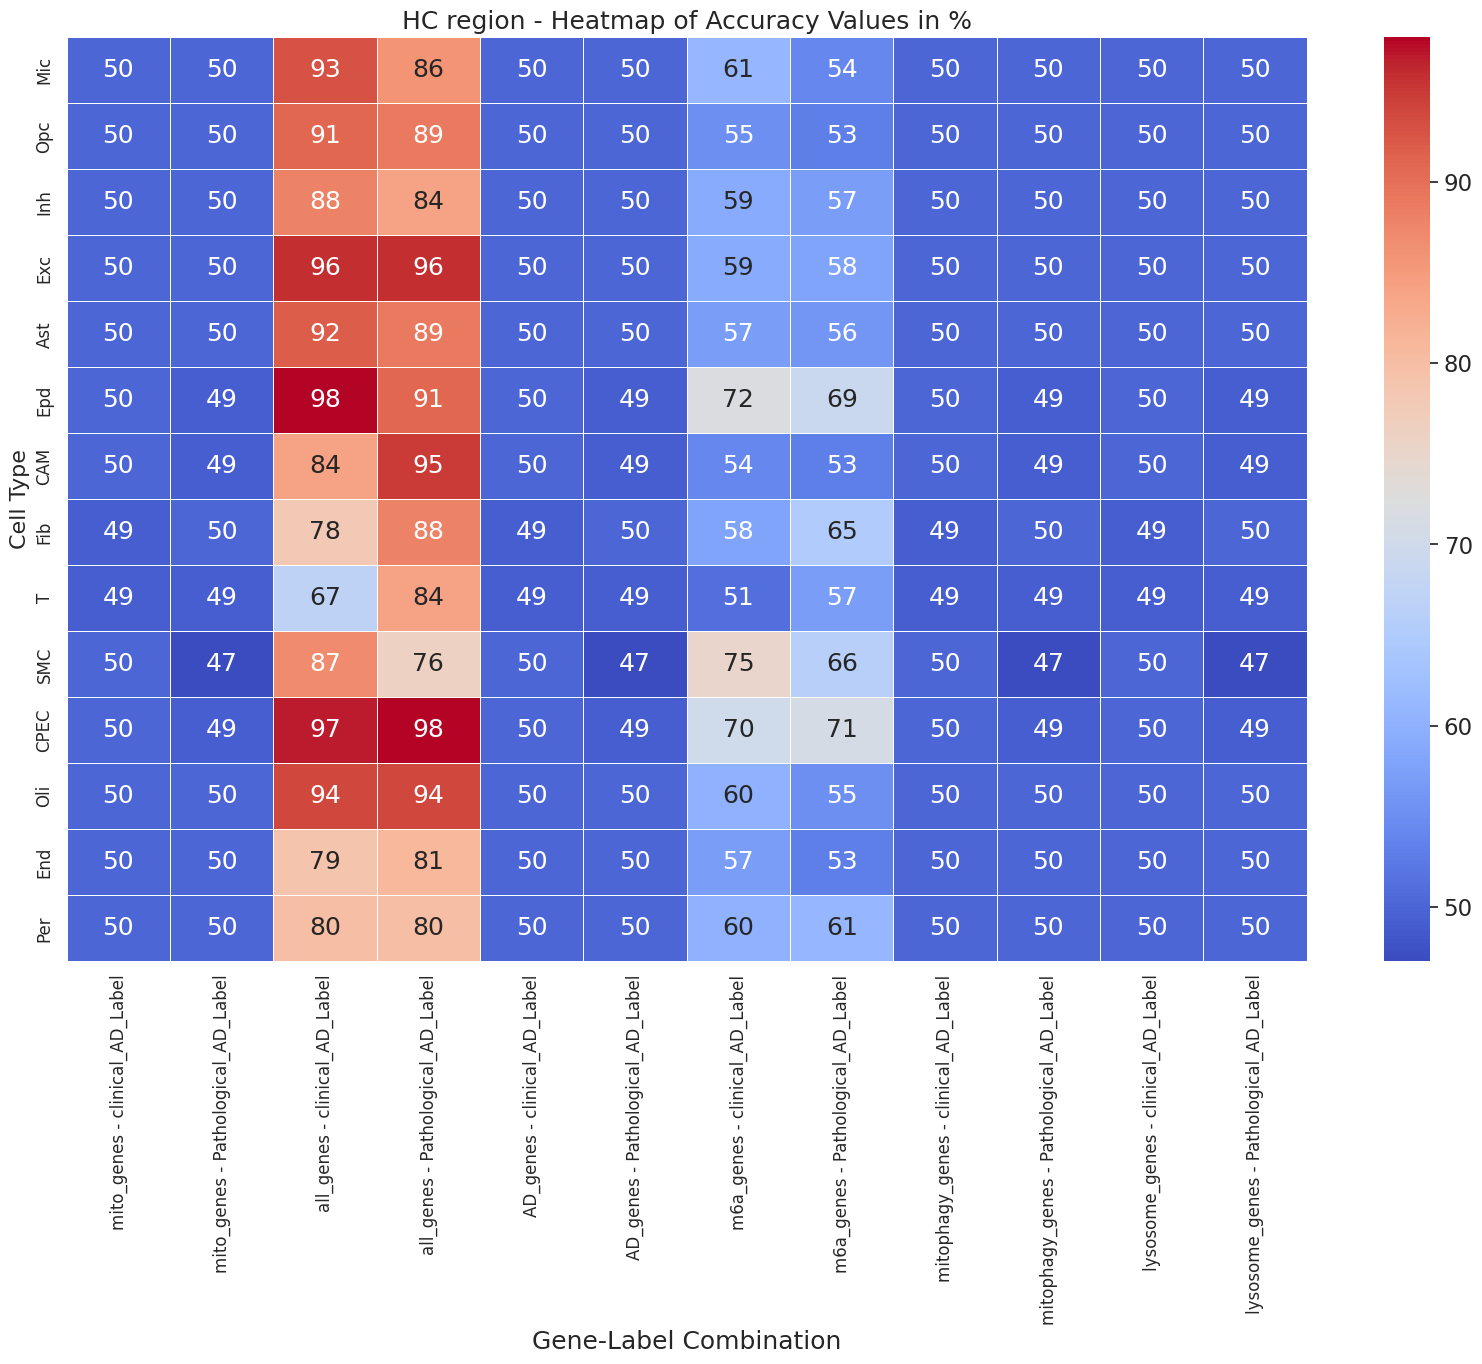

In [135]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("HC.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("HC region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/HC_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_588414/2470645736.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)


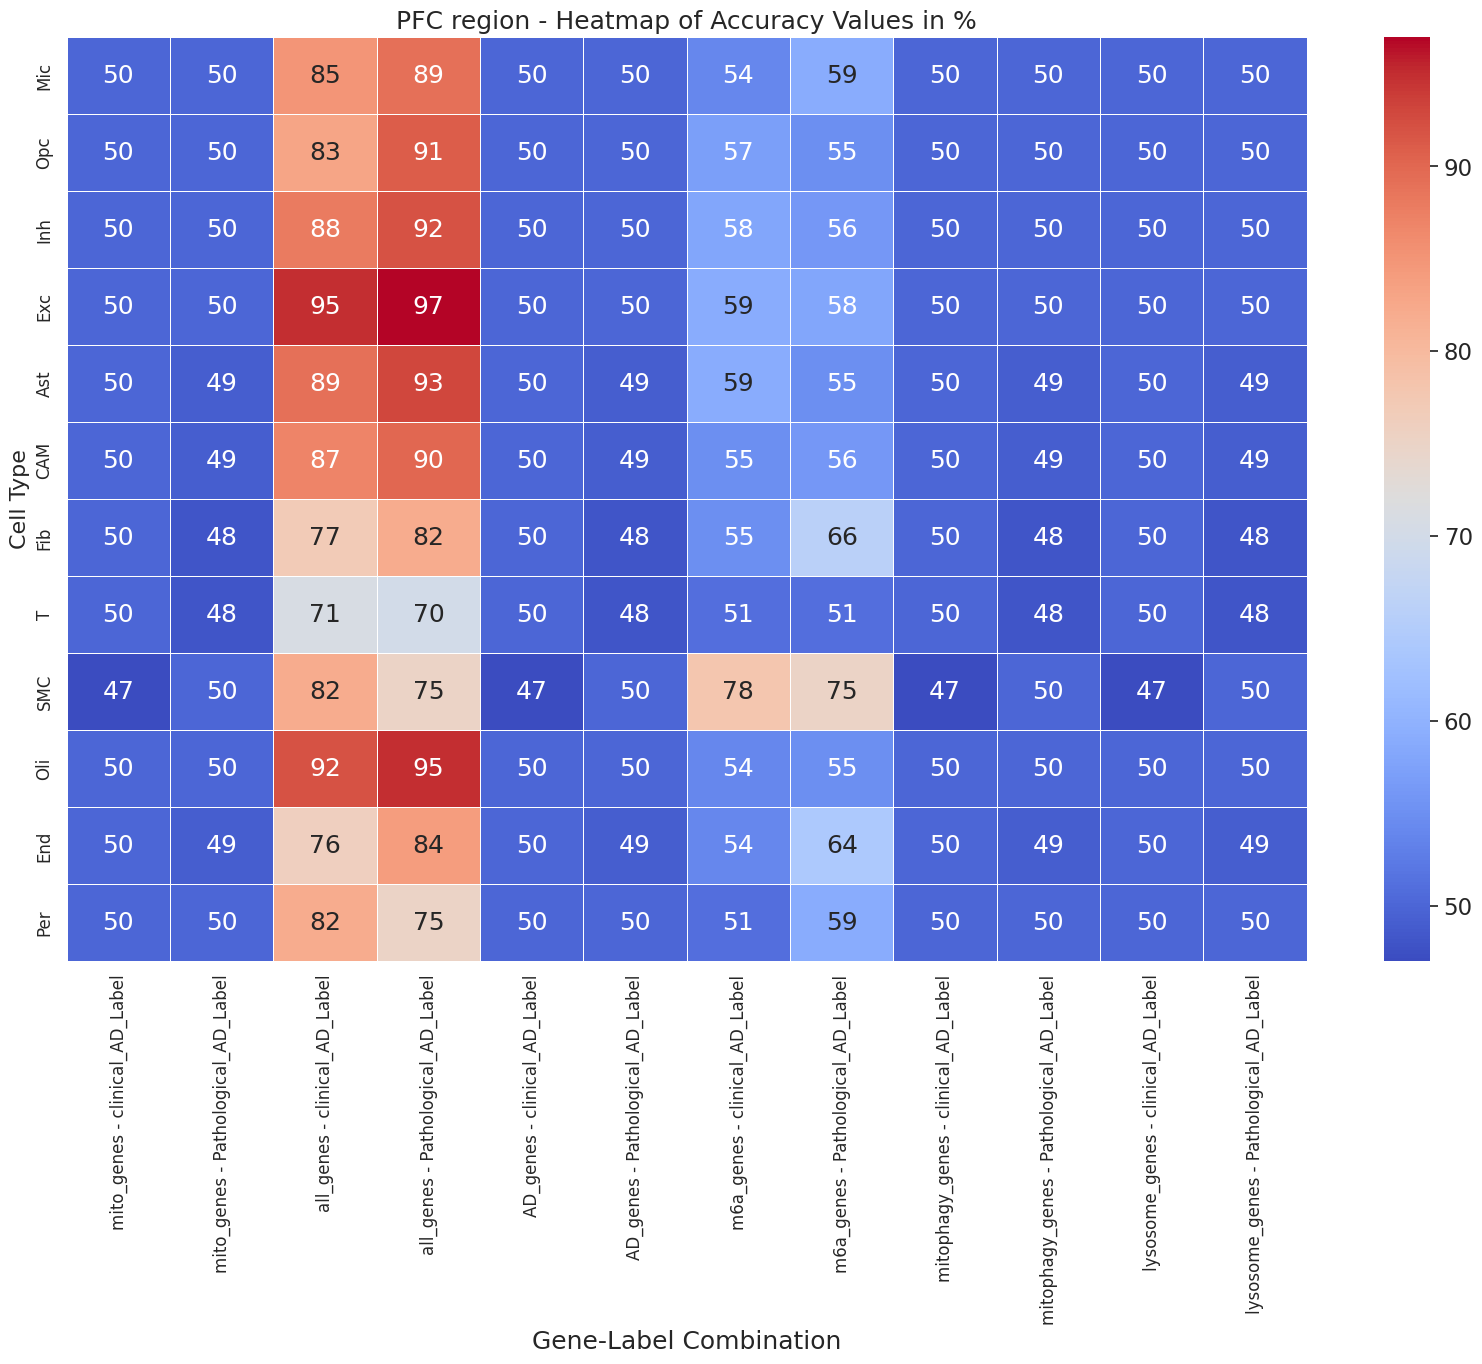

In [143]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("PFC.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("PFC region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/PFC_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

In [141]:
list(data.keys())

['Per.all_genes.clinical_AD_Label',
 'Per.m6a_genes.clinical_AD_Label',
 'Per.mito_genes.clinical_AD_Label',
 'Per.mitophagy_genes.clinical_AD_Label',
 'Per.AD_genes.clinical_AD_Label',
 'Per.lysosome_genes.clinical_AD_Label',
 'Per.all_genes.Pathological_AD_Label',
 'Per.m6a_genes.Pathological_AD_Label',
 'Per.mito_genes.Pathological_AD_Label',
 'Per.mitophagy_genes.Pathological_AD_Label',
 'Per.AD_genes.Pathological_AD_Label',
 'Per.lysosome_genes.Pathological_AD_Label',
 'Opc.all_genes.clinical_AD_Label',
 'Opc.m6a_genes.clinical_AD_Label',
 'Opc.mito_genes.clinical_AD_Label',
 'Opc.mitophagy_genes.clinical_AD_Label',
 'Opc.AD_genes.clinical_AD_Label',
 'Opc.lysosome_genes.clinical_AD_Label',
 'Opc.all_genes.Pathological_AD_Label',
 'Opc.m6a_genes.Pathological_AD_Label',
 'Opc.mito_genes.Pathological_AD_Label',
 'Opc.mitophagy_genes.Pathological_AD_Label',
 'Opc.AD_genes.Pathological_AD_Label',
 'Opc.lysosome_genes.Pathological_AD_Label',
 'Oli.all_genes.clinical_AD_Label',
 'Oli.m6

/tmp/ipykernel_588414/3825376792.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)


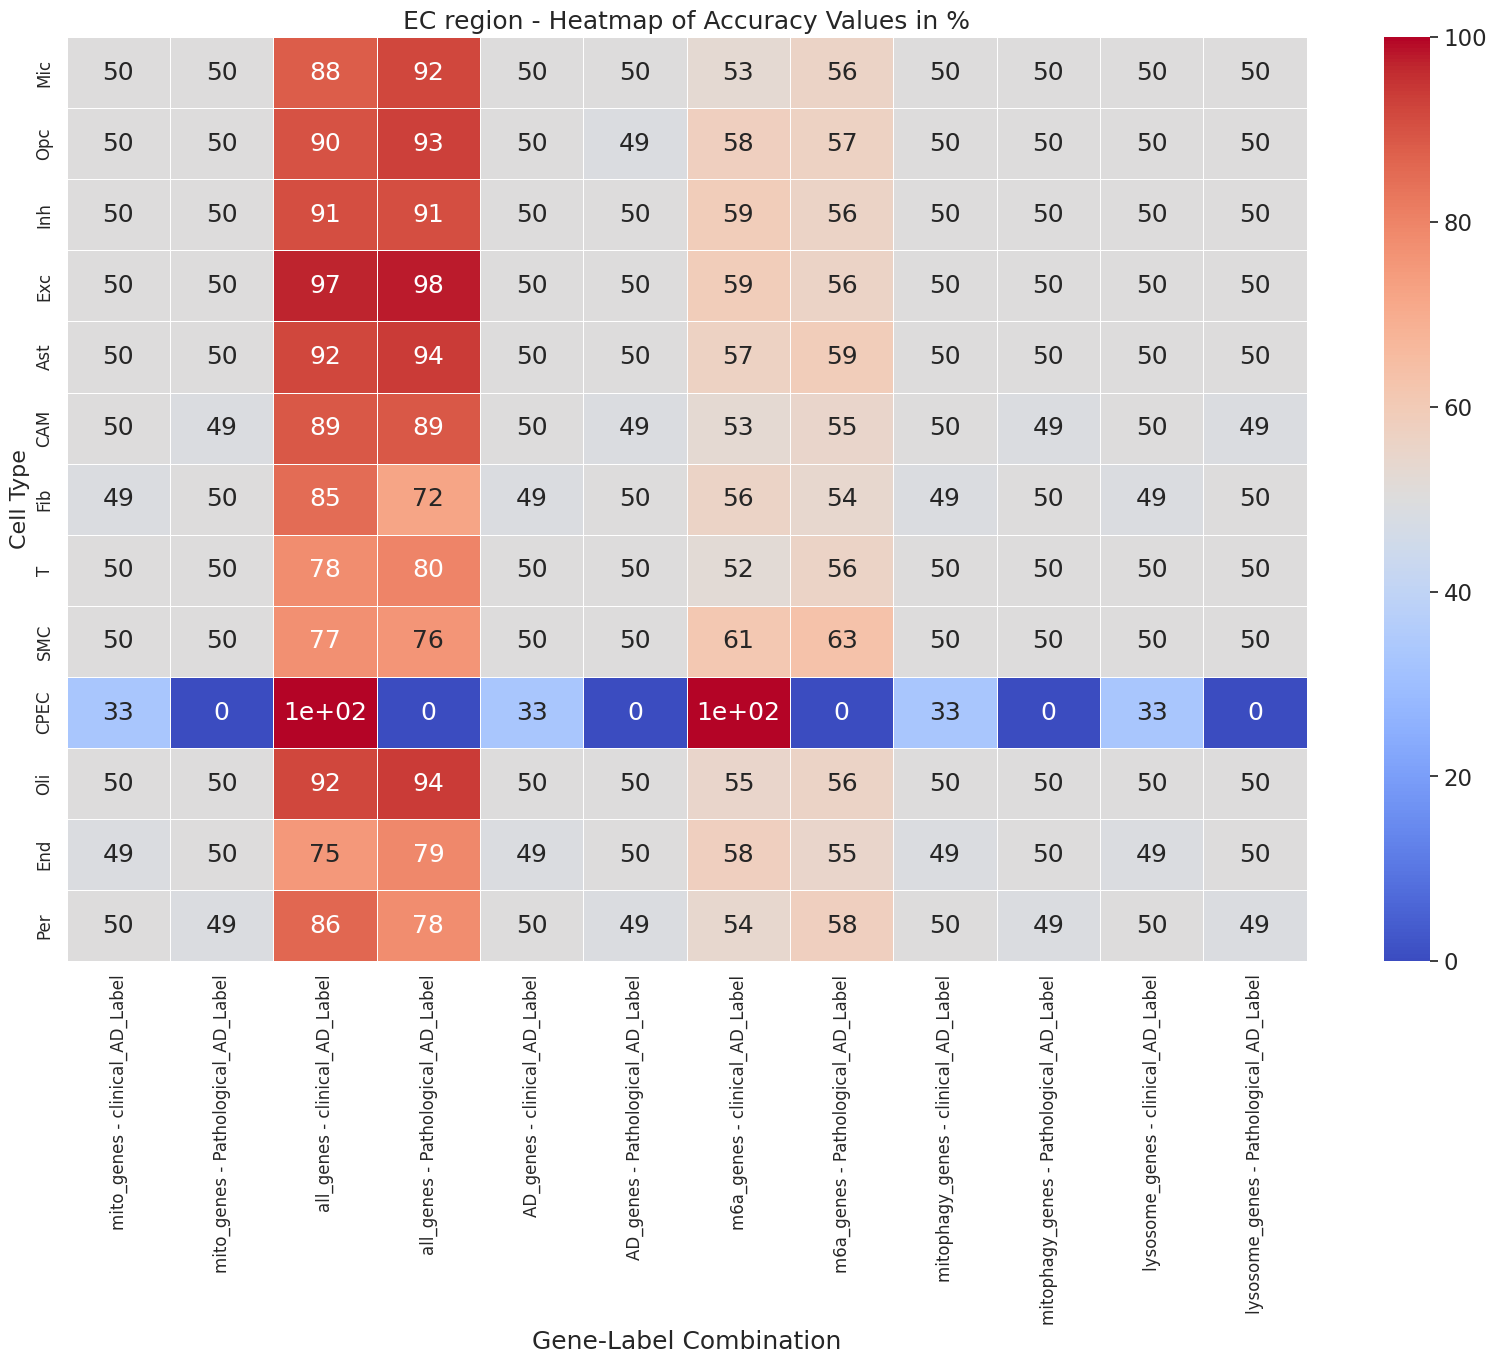

In [142]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("EC.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("EC region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/EC_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_588414/2617992930.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)


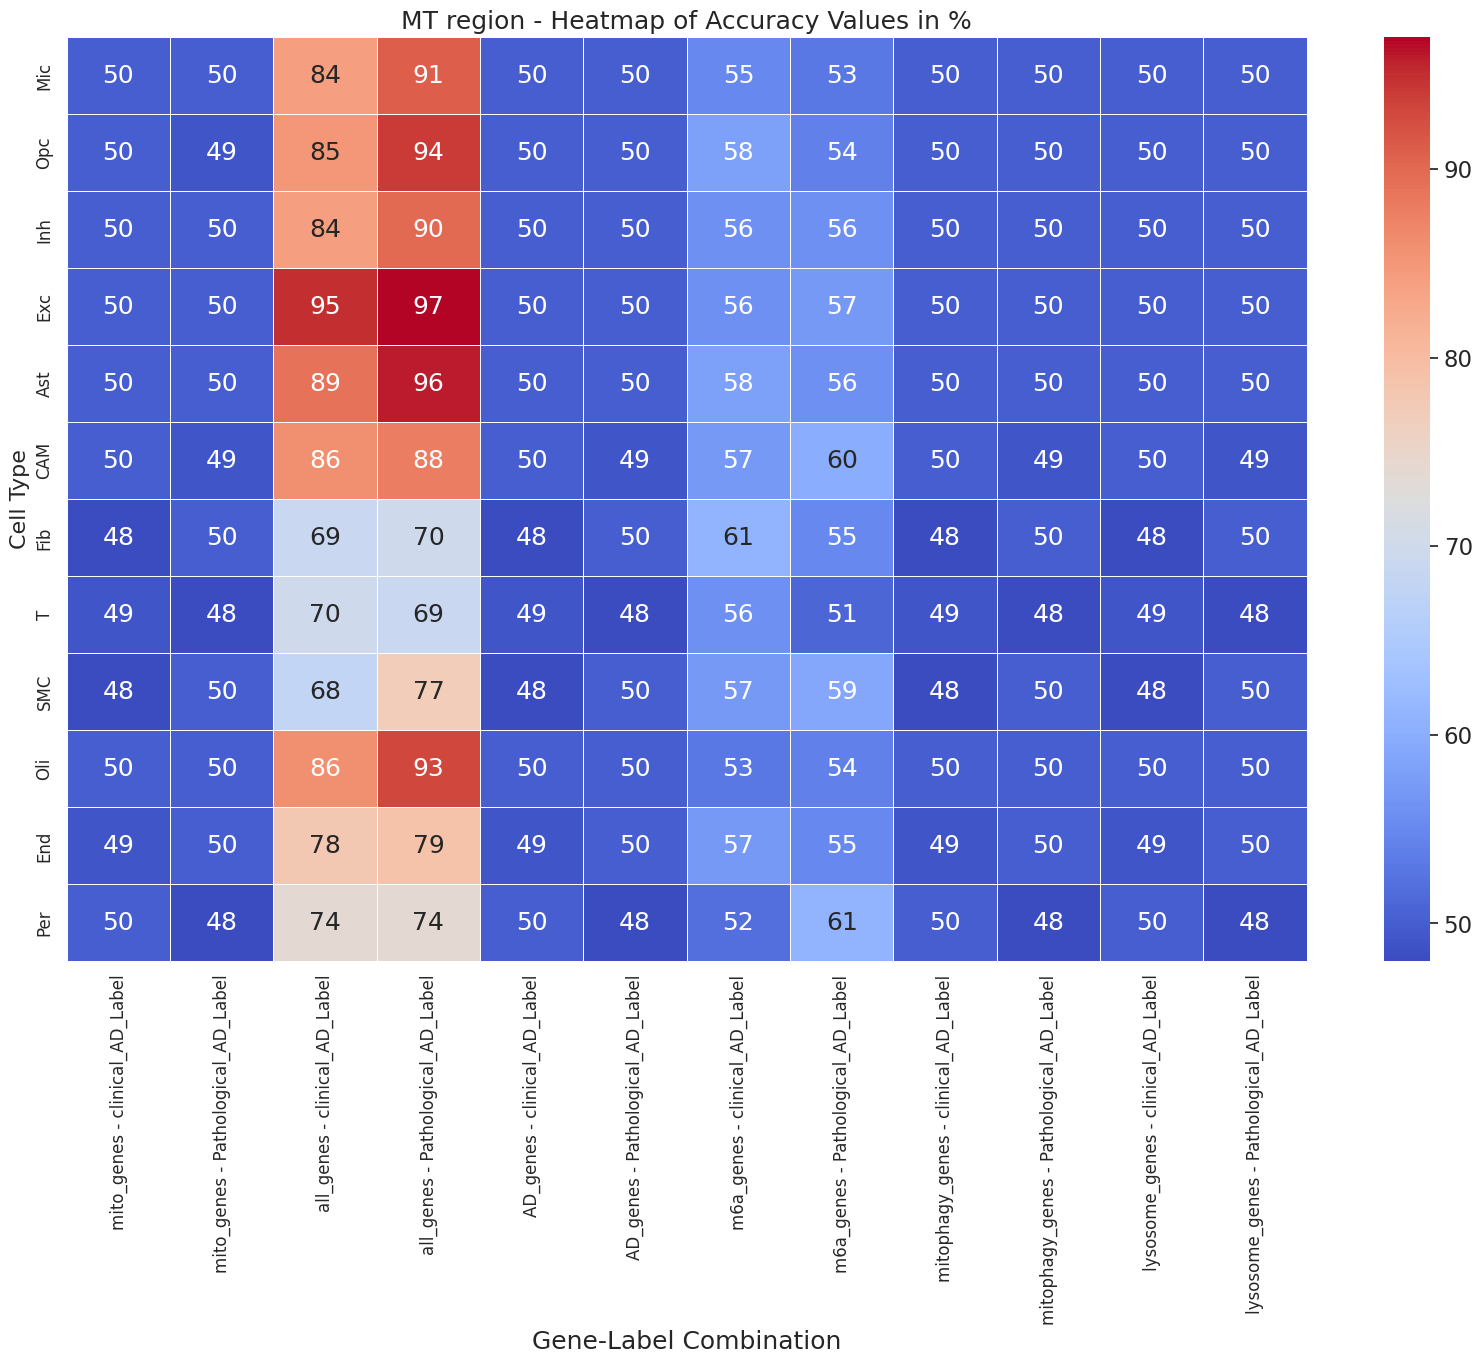

In [144]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("MT.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("MT region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/MT_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_588414/3440767924.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)


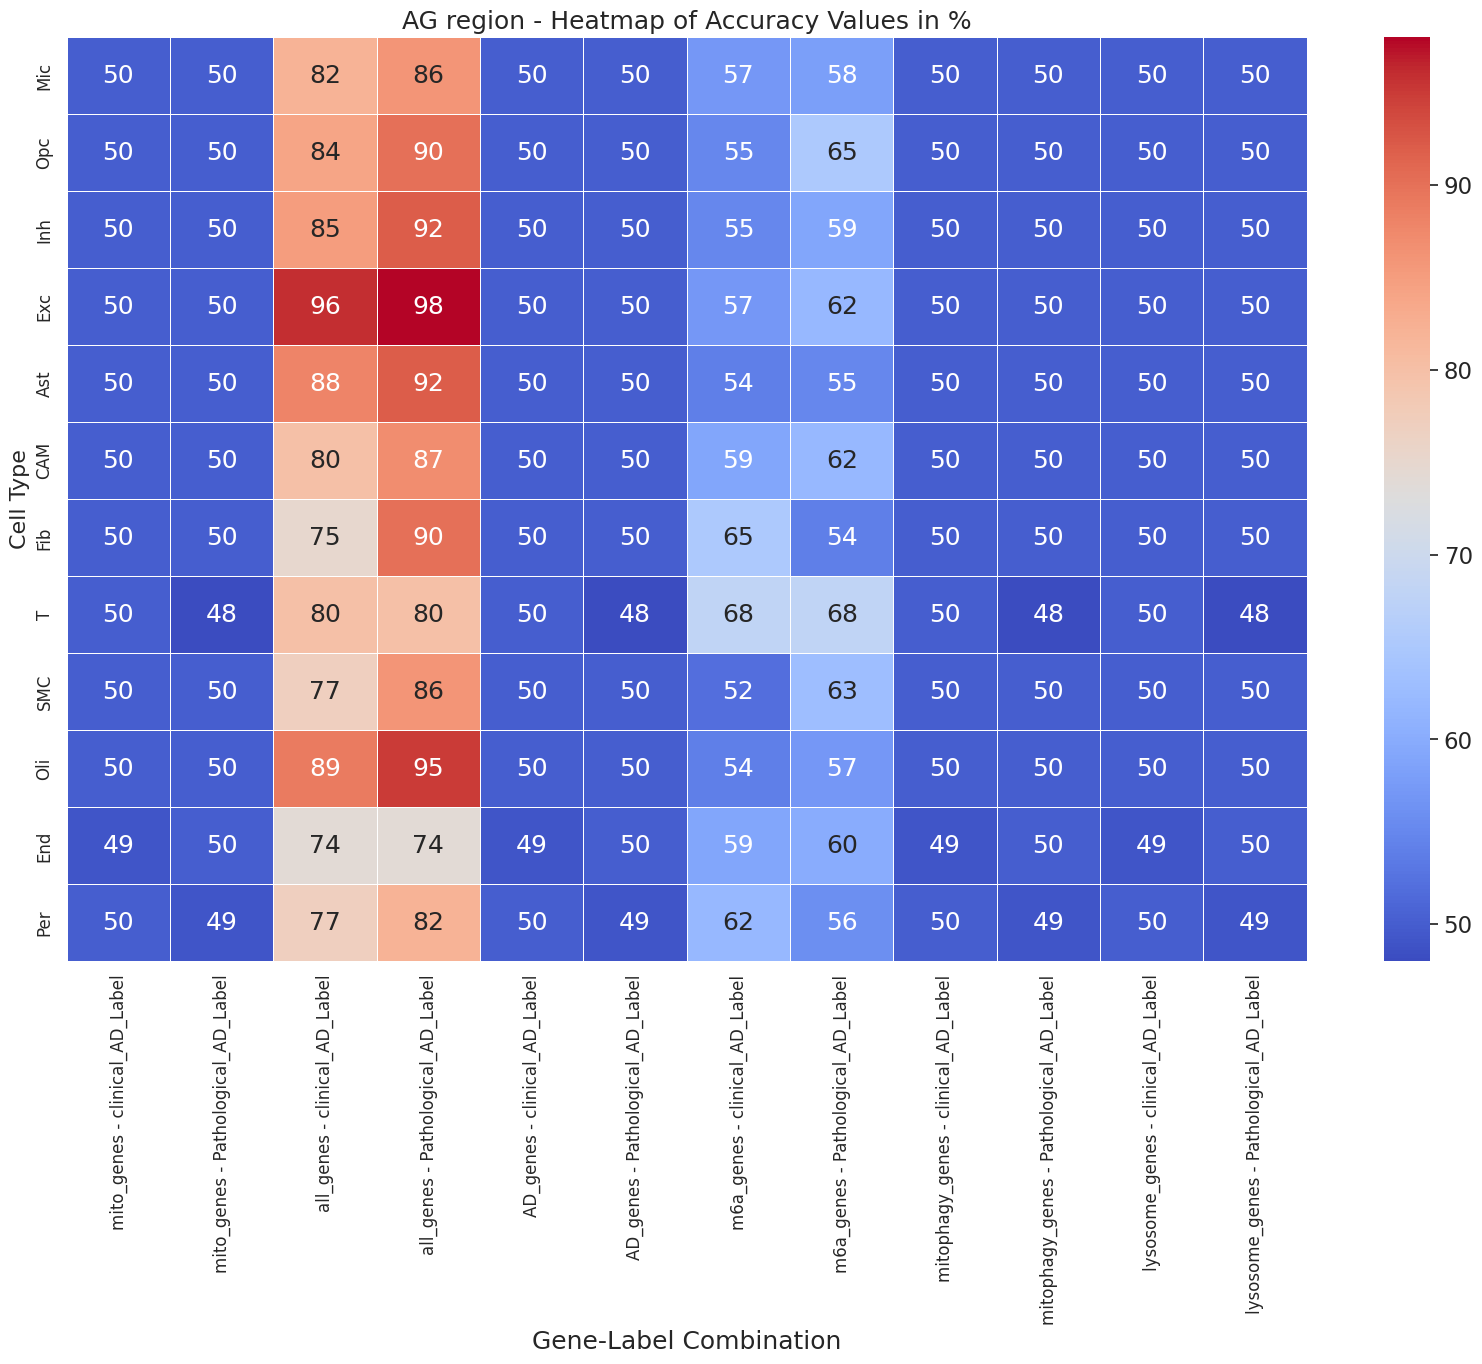

In [146]:
import pandas as pd

# Open the pickle file in read-binary mode
with open("AG.pkl", "rb") as file:
    data = pickle.load(file)
     

# Print or use the loaded data
#print(data)


df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy']).reset_index()
df_split = df["index"].str.split(".", expand=True)

# Rename columns based on expected structure
df_split.columns = ["Cell Type", "Gene Set", "Category"]

# Merge with original DataFrame (if needed)
df_final = pd.concat([df_split, df["Accuracy"]], axis=1)

#print(df_final)


cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))




df = df_final.copy()

rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            try:
                results.append(result.tolist()[0])
            except:
                results.append(0)
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results     

col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 



heatmap_df = pd.DataFrame(columns = col_names_new)
heatmap_df

heatmap_df = pd.concat([heatmap_df, pd.DataFrame(rows, columns=heatmap_df.columns)], ignore_index=True)



heatmap_df
heatmap_df.set_index('Cell Type', inplace = True)
heatmap_df = heatmap_df.astype(int)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("AG region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.savefig(f"./plots/AG_heatmap_accuracy_values.png", dpi=300, bbox_inches='tight')

plt.show()

In [130]:
df[df['Cell Type'] == 'CPEC']

,Cell Type,Gene Set,Category,Accuracy
120,CPEC,all_genes,clinical_AD_Label,100.000000
121,CPEC,m6a_genes,clinical_AD_Label,100.000000
122,CPEC,mito_genes,clinical_AD_Label,33.333333
123,CPEC,mitophagy_genes,clinical_AD_Label,33.333333
124,CPEC,AD_genes,clinical_AD_Label,33.333333
125,CPEC,lysosome_genes,clinical_AD_Label,33.333333


In [13]:
df_final

,Cell Type,Gene Set,Category,Accuracy
0,Per,all_genes,clinical_AD_Label,80.769231
1,Per,m6a_genes,clinical_AD_Label,60.256410
2,Per,mito_genes,clinical_AD_Label,50.000000
3,Per,mitophagy_genes,clinical_AD_Label,50.000000
4,Per,AD_genes,clinical_AD_Label,50.000000
...,...,...,...,...
163,Epd,m6a_genes,Pathological_AD_Label,69.172932
164,Epd,mito_genes,Pathological_AD_Label,49.624060
165,Epd,mitophagy_genes,Pathological_AD_Label,49.624060
166,Epd,AD_genes,Pathological_AD_Label,49.624060


In [15]:
for i in set(df_final['Cell Type'].tolist()):
    print(i)

Mic
Opc
Inh
Exc
Ast
Epd
CAM
Fib
T
SMC
CPEC
Oli
End
Per


In [27]:
cell_types = list(set(df_final['Cell Type'].tolist()))
gene_sets = list(set(df_final['Gene Set'].tolist()))
categories = list(set(df_final['Category'].tolist()))

In [21]:
print(cell_type)
print(gene_set)
print(categories)

['Mic', 'Opc', 'Inh', 'Exc', 'Ast', 'Epd', 'CAM', 'Fib', 'T', 'SMC', 'CPEC', 'Oli', 'End', 'Per']
['mito_genes', 'all_genes', 'AD_genes', 'm6a_genes', 'mitophagy_genes', 'lysosome_genes']
['clinical_AD_Label', 'Pathological_AD_Label']


In [17]:
Ast_df = df_final[df_final['Cell Type'] == 'Ast']

In [18]:
Ast_df

,Cell Type,Gene Set,Category,Accuracy
36,Ast,all_genes,clinical_AD_Label,92.355752
37,Ast,m6a_genes,clinical_AD_Label,57.368614
38,Ast,mito_genes,clinical_AD_Label,50.018376
39,Ast,mitophagy_genes,clinical_AD_Label,50.018376
40,Ast,AD_genes,clinical_AD_Label,50.018376
41,Ast,lysosome_genes,clinical_AD_Label,50.018376
42,Ast,all_genes,Pathological_AD_Label,89.791389
43,Ast,m6a_genes,Pathological_AD_Label,56.502441
44,Ast,mito_genes,Pathological_AD_Label,50.022193
45,Ast,mitophagy_genes,Pathological_AD_Label,50.022193


In [23]:
df = df_final
df

,Cell Type,Gene Set,Category,Accuracy
0,Per,all_genes,clinical_AD_Label,80.769231
1,Per,m6a_genes,clinical_AD_Label,60.256410
2,Per,mito_genes,clinical_AD_Label,50.000000
3,Per,mitophagy_genes,clinical_AD_Label,50.000000
4,Per,AD_genes,clinical_AD_Label,50.000000
...,...,...,...,...
163,Epd,m6a_genes,Pathological_AD_Label,69.172932
164,Epd,mito_genes,Pathological_AD_Label,49.624060
165,Epd,mitophagy_genes,Pathological_AD_Label,49.624060
166,Epd,AD_genes,Pathological_AD_Label,49.624060


In [26]:
condition = (
    (df["Cell Type"] == "Epd") & 
    (df["Gene Set"] == "m6a_genes") & 
    (df["Category"] == "Pathological_AD_Label")
)

# Get the Accuracy values where conditions match
result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
print(result.to_list()) 

[69.17293233082707]


In [32]:
rows = [[] for i in range(len(cell_types))]
rows

[[], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [50]:
rows = [[] for i in range(len(cell_types))]
col_names = []
for i,cell_type in enumerate(cell_types):
    results = []
    for gene_set in gene_sets:
        for category in categories:
            condition = (
                (df["Cell Type"] == cell_type) & 
                (df["Gene Set"] == gene_set ) & 
                (df["Category"] == category)
            )
            result = df.loc[condition, "Accuracy"]

# Print the matched Accuracy values
            #print(cell_type, gene_set, category, result)
            col_name = f"{gene_set} - {category}"
            if i ==0:
                col_names.append(col_name)
            results.append(result.tolist()[0])
    temp_results = [cell_type]
    temp_results.extend(results)
    rows[i] =  temp_results            

In [51]:
rows[0]

['Mic',
 50.0,
 50.0,
 93.03867403314918,
 86.8144690781797,
 50.0,
 50.0,
 61.049723756906076,
 54.72578763127188,
 50.0,
 50.0,
 50.0,
 50.0]

In [52]:
rows[1]

['Opc',
 50.0,
 50.04248088360238,
 91.41935483870968,
 89.7196261682243,
 50.0,
 50.04248088360238,
 55.74193548387097,
 53.18606627017842,
 50.0,
 50.04248088360238,
 50.0,
 50.04248088360238]

In [59]:
col_names_new = ['Cell Type']
col_names_new .extend(col_names)
col_names_new 

['Cell Type',
 'mito_genes - clinical_AD_Label',
 'mito_genes - Pathological_AD_Label',
 'all_genes - clinical_AD_Label',
 'all_genes - Pathological_AD_Label',
 'AD_genes - clinical_AD_Label',
 'AD_genes - Pathological_AD_Label',
 'm6a_genes - clinical_AD_Label',
 'm6a_genes - Pathological_AD_Label',
 'mitophagy_genes - clinical_AD_Label',
 'mitophagy_genes - Pathological_AD_Label',
 'lysosome_genes - clinical_AD_Label',
 'lysosome_genes - Pathological_AD_Label']

In [60]:
col_names

['mito_genes - clinical_AD_Label',
 'mito_genes - Pathological_AD_Label',
 'all_genes - clinical_AD_Label',
 'all_genes - Pathological_AD_Label',
 'AD_genes - clinical_AD_Label',
 'AD_genes - Pathological_AD_Label',
 'm6a_genes - clinical_AD_Label',
 'm6a_genes - Pathological_AD_Label',
 'mitophagy_genes - clinical_AD_Label',
 'mitophagy_genes - Pathological_AD_Label',
 'lysosome_genes - clinical_AD_Label',
 'lysosome_genes - Pathological_AD_Label']

In [56]:
df_final[df_final['Cell Type'] == 'Opc']

,Cell Type,Gene Set,Category,Accuracy
12,Opc,all_genes,clinical_AD_Label,91.419355
13,Opc,m6a_genes,clinical_AD_Label,55.741935
14,Opc,mito_genes,clinical_AD_Label,50.000000
15,Opc,mitophagy_genes,clinical_AD_Label,50.000000
16,Opc,AD_genes,clinical_AD_Label,50.000000
17,Opc,lysosome_genes,clinical_AD_Label,50.000000
18,Opc,all_genes,Pathological_AD_Label,89.719626
19,Opc,m6a_genes,Pathological_AD_Label,53.186066
20,Opc,mito_genes,Pathological_AD_Label,50.042481
21,Opc,mitophagy_genes,Pathological_AD_Label,50.042481


In [62]:
HC_df = pd.DataFrame(columns = col_names_new)
HC_df

,Cell Type,mito_genes - clinical_AD_Label,mito_genes - Pathological_AD_Label,all_genes - clinical_AD_Label,all_genes - Pathological_AD_Label,AD_genes - clinical_AD_Label,AD_genes - Pathological_AD_Label,m6a_genes - clinical_AD_Label,m6a_genes - Pathological_AD_Label,mitophagy_genes - clinical_AD_Label,mitophagy_genes - Pathological_AD_Label,lysosome_genes - clinical_AD_Label,lysosome_genes - Pathological_AD_Label


In [63]:
HC_df = pd.concat([HC_df, pd.DataFrame(rows, columns=HC_df.columns)], ignore_index=True)


/tmp/ipykernel_588414/1855338809.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  HC_df = pd.concat([HC_df, pd.DataFrame(rows, columns=HC_df.columns)], ignore_index=True)


In [66]:
HC_df = HC_df.astype(int)
HC_df
HC_df.set_index('Cell Type', inplace = True)

,mito_genes - clinical_AD_Label,mito_genes - Pathological_AD_Label,all_genes - clinical_AD_Label,all_genes - Pathological_AD_Label,AD_genes - clinical_AD_Label,AD_genes - Pathological_AD_Label,m6a_genes - clinical_AD_Label,m6a_genes - Pathological_AD_Label,mitophagy_genes - clinical_AD_Label,mitophagy_genes - Pathological_AD_Label,lysosome_genes - clinical_AD_Label,lysosome_genes - Pathological_AD_Label
Cell Type,,,,,,,,,,,,
Mic,50,50,93,86,50,50,61,54,50,50,50,50
Opc,50,50,91,89,50,50,55,53,50,50,50,50
Inh,50,50,88,84,50,50,59,57,50,50,50,50
Exc,50,50,96,96,50,50,59,58,50,50,50,50
Ast,50,50,92,89,50,50,57,56,50,50,50,50
Epd,50,49,98,91,50,49,72,69,50,49,50,49
CAM,50,49,84,95,50,49,54,53,50,49,50,49
Fib,49,50,78,88,49,50,58,65,49,50,49,50
T,49,49,67,84,49,49,51,57,49,49,49,49


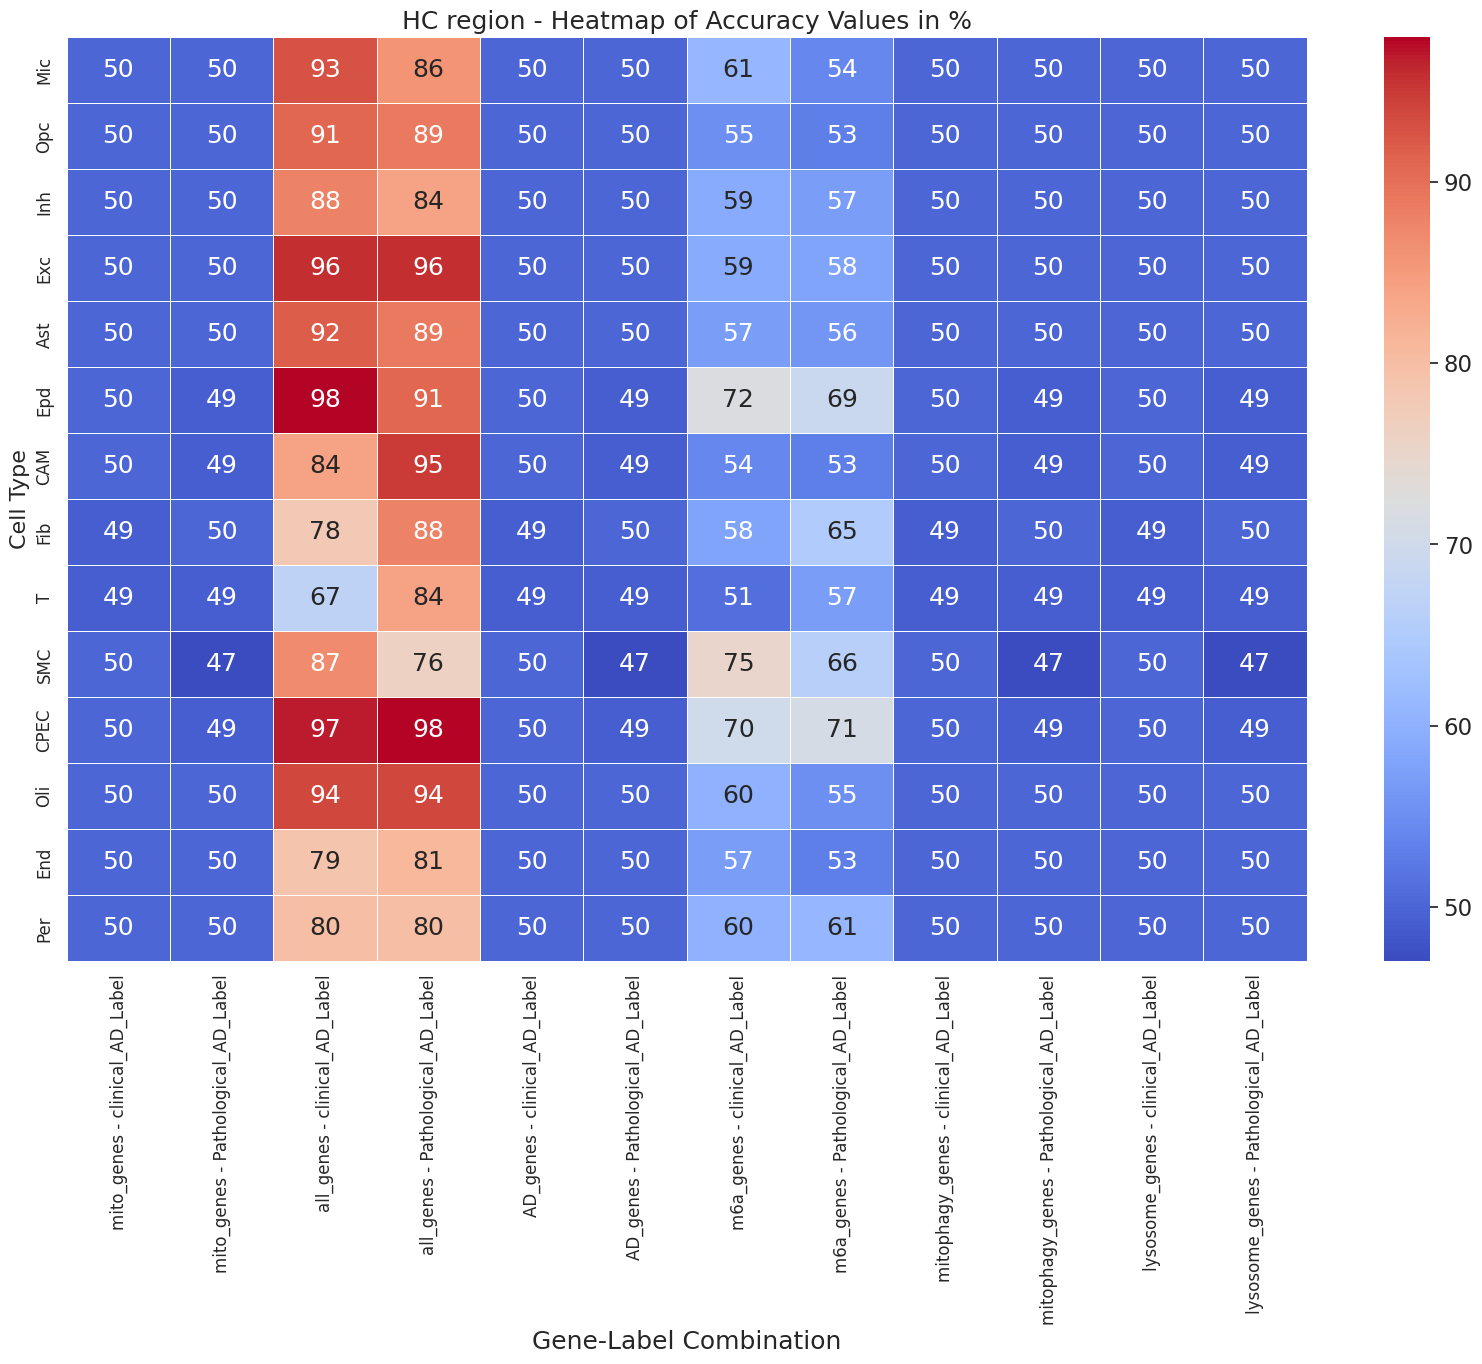

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5) 
sns.heatmap(HC_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels
plt.xlabel("Gene-Label Combination")
plt.ylabel("Cell Type")
plt.ylabel("Cell Type", fontsize=16)

plt.title("HC region - Heatmap of Accuracy Values in %")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the heatmap
plt.show()